In [135]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


print("Setup complete")

Setup complete


In [136]:
img_w,img_h = 64, 64
IMG_DIM = (img_w,img_h)

PATH = "data/"
LABELS = ["Fully Covered", "Not Covered", "Not a Face", "Partially Covered"]

In [137]:
# creating our training dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    directory=PATH,
    image_size=(img_h, img_w),
    subset="training",
    seed=123,
    batch_size=32,
    validation_split=0.2)


Found 6621 files belonging to 4 classes.
Using 5297 files for training.


In [138]:
# creating our validation training set
val_ds = keras.preprocessing.image_dataset_from_directory(
    directory=PATH,
    image_size=IMG_DIM,
    subset="validation",
    seed=234,
    batch_size=32,
    validation_split=0.2)


Found 6621 files belonging to 4 classes.
Using 1324 files for validation.


In [139]:
class_names = train_ds.class_names
print(class_names)

['fully_covered', 'not_covered', 'not_face', 'partially_covered']


In [140]:
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# class Model(keras.Model):

#     def __init__(self):
#         super().__init__()
#         self.input_layer = keras.layers.InputLayer(input_shape=(64, 64, 3))
#         self.rescaling_layer = keras.layers.experimental.preprocessing.Rescaling(
#             1. / 255, input_shape=(img_h, img_w, 3))
#         self.layer_1 = keras.layers.Dense(64, activation='relu')
#         self.layer_2 = keras.layers.Dense(64, activation='relu')
#         self.layer_3 = keras.layers.Dense(32, activation='relu')
#         self.flatten_layer = keras.layers.Flatten()
#         self.output_layer = keras.layers.Dense(num_classes, activation='relu')

#     def call(self, ds):
#         ds = self.input_layer(ds)
#         ds = self.flatten_layer(ds)
#         ds = self.rescaling_layer(ds)
#         ds = self.layer_1(ds)
#         ds = self.layer_2(ds)
#         ds = self.layer_3(ds)
#         ds = self.flatten_layer(ds)
#         return self.output_layer(ds)


In [141]:
#model = Model()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

In [142]:
model.fit(x=train_ds, validation_data=val_ds,epochs=5)


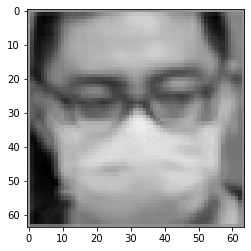

Model Prediction: fully_covered
Actual: fully_covered


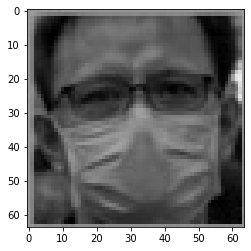

Model Prediction: fully_covered
Actual: fully_covered


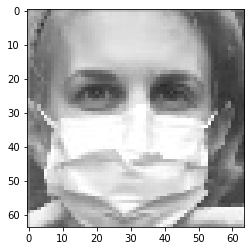

Model Prediction: fully_covered
Actual: fully_covered


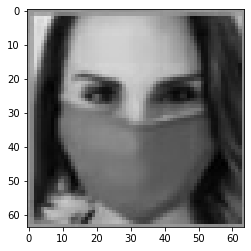

Model Prediction: fully_covered
Actual: fully_covered


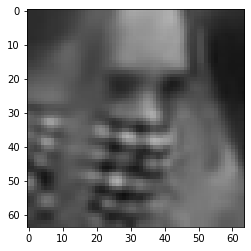

Model Prediction: fully_covered
Actual: fully_covered


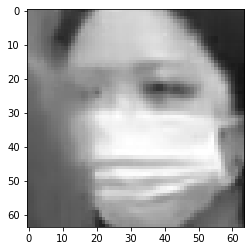

Model Prediction: fully_covered
Actual: fully_covered



KeyboardInterrupt



In [143]:
# take one batch of 32 from the total dataset
plt.figure()
for images, labels in train_ds.take(1):
    results = model.predict(train_ds, batch_size=32)
    for idx, r in enumerate(results):
        if int(tf.argmax(r)) == int(labels[idx]):
            plt.imshow(images[idx].numpy().astype('uint8'))
            plt.show()
            print(f"Model Prediction: {class_names[int(tf.argmax(r))]}")
            print(f"Actual: {class_names[int(labels[idx])]}")